In [1]:
### SIMULATED_BNS_PLOTS.IPYNB -- paper plots of injected populations

In [2]:
# load packages

import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import special packages

! python3 -m pip install bilby # only need to run this once
! python3 -m pip install lalsuite # only need to run this once

import bilby
import lal
import lalsimulation as lalsim
import astropy.units as u
from astropy.coordinates import Distance
from astropy.cosmology import Planck15 as cosmo

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [43]:
# user input

SCENARIOS = ['3G', 'O5', 'O4']

INPUT_PATHS = ['./dat/{0}_unif_BNS_DBHF2010/BNS_MassesSpinsLambdas.csv'.format(SCENARIO) for SCENARIO in SCENARIOS]

plt.rc('font', size=24, family='serif') #controls default text size
plt.rc('mathtext', fontset='stix')
plt.rc('axes', titlesize=24) #fontsize of the title
plt.rc('axes', labelsize=24) #fontsize of the x and y labels
plt.rc('xtick', labelsize=16) #fontsize of the x tick labels
plt.rc('ytick', labelsize=16) #fontsize of the y tick labels
plt.rc('legend', fontsize=16) #fontsize of the legend

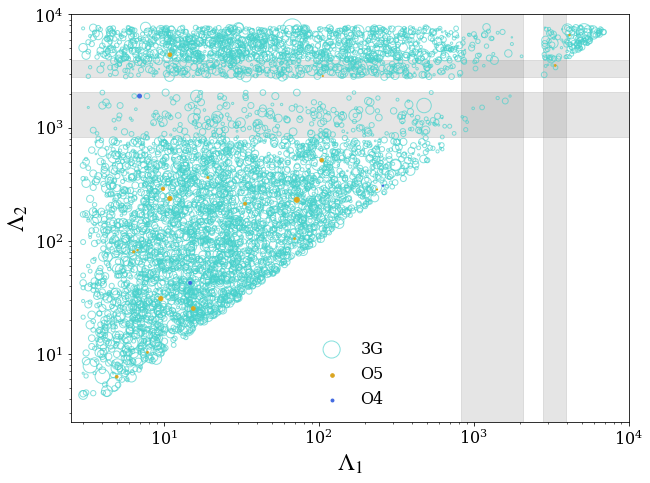

In [81]:
# load samples

COLORS = ['mediumturquoise', 'goldenrod', 'royalblue']
FACECOLORS = ['none', 'goldenrod', 'royalblue']
ALPHAS = [0.66, 1., 1.]
LABELS = ['3G', 'O5', 'O4']

plt.figure(figsize=(10.,0.75*10.))

plt.fill_between([1e-1,1e5],2782.24901831,3938.2134570550247,color='gray',alpha=0.2)
plt.fill_between([1e-1,1e5],829.7522177166647,2078.73218697,color='gray',alpha=0.2)
    
plt.fill_betweenx([1e-1,1e5],2782.24901831,3938.2134570550247,color='gray',alpha=0.2)
plt.fill_betweenx([1e-1,1e5],829.7522177166647,2078.73218697,color='gray',alpha=0.2)

for i in range(len(SCENARIOS)):
    
    data = np.genfromtxt(INPUT_PATHS[i],names=True,dtype=None,delimiter=',')
    
    snrs = data['snr'] # FIXME: drop subthreshold events, scale point size by SNR?
    m1s = [data['m1'][j] for j in range(len(data['m1'])) if snrs[j] >= 12.]
    m2s = [data['m2'][j] for j in range(len(data['m2'])) if snrs[j] >= 12.]
    L1s = [data['Lambda1'][j] for j in range(len(data['Lambda1'])) if snrs[j] >= 12. and data['Lambda2'][j] > data['Lambda1'][j]]
    L2s = [data['Lambda2'][j] for j in range(len(data['Lambda2'])) if snrs[j] >= 12. and data['Lambda2'][j] > data['Lambda1'][j]]
    snrs_det = [data['snr'][j]-11. for j in range(len(data['snr'])) if snrs[j] >= 12. and data['Lambda2'][j] > data['Lambda1'][j]]
    
    plt.scatter(L1s,L2s,edgecolors=COLORS[i],facecolors=FACECOLORS[i],s=snrs_det,alpha=ALPHAS[i],label=LABELS[i])
    
plt.xlim(2.5e0,1e4)
plt.ylim(2.5e0,1e4)
plt.xlabel(r'$\Lambda_1$',fontsize=24)
plt.ylabel(r'$\Lambda_2$',fontsize=24)
plt.xscale('log')
plt.yscale('log')

plt.legend(loc='lower center',frameon=False)
plt.show()